# Restaurant Sales report
**EDA and Analysis Ideas for restaurant business**

# File Description:

#### File Format: CSV
#### Columns: This dataset includes columns such as order_id, date, item_name, item_type, item_price, quantity, transaction_amount, transaction_type, received_by, and time_of_sale.
#### Data Size: This file contains 1000 rows and 10 columns.
#### Data Structure: The dataset is organized as a single CSV file, providing information on transactions at a local restaurant.
#### Data Cleaning and Preprocessing: The data has been carefully reviewed and cleaned to address duplicates and missing values, ensuring data quality for analysis.
#### Date of Last Update: The dataset was last updated on March 31, 2023.
#### Special Notes: Please note that the 'transaction_amount' column represents the total transaction amount, derived from the multiplication of 'item_price' and 'quantity' for each item in the order.
#### Data Source: This data was collected from a local restaurant situated near my home and is made available for analysis and educational purposes.

## Data Description:
This dataset captures sales transactions from a local restaurant near my home. It includes details such as the order ID, date of the transaction, item names (representing various food and beverage items), item types (categorized as Fast-food or Beverages), item prices, quantities ordered, transaction amounts, transaction types (cash, online, or others), the gender of the staff member who received the order, and the time of the sale (Morning, Evening, Afternoon, Night, Midnight). The dataset offers a valuable snapshot of the restaurant's daily operations and customer behavior.

### Columns:

    order_id: a unique identifier for each order.
    date: date of the transaction.
    item_name: name of the food.
    item_type: category of item (Fastfood or Beverages).
    item_price: price of the item for 1 quantity.
    Quantity: how much quantity the customer orders.
    transaction_amount: the total amount paid by customers.
    transaction_type: payment method (cash, online, others).
    received_by: gender of the person handling the transaction.
    time_of_sale: different times of the day (Morning, Evening, Afternoon, Night, Midnight).

In [7]:
#Step1 - Import the necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [5]:
#Step2 - Read and Understand the data
df=pd.read_csv('Balaji Fast Food Sales.csv')
df.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            1000 non-null   int64 
 1   date                1000 non-null   object
 2   item_name           1000 non-null   object
 3   item_type           1000 non-null   object
 4   item_price          1000 non-null   int64 
 5   quantity            1000 non-null   int64 
 6   transaction_amount  1000 non-null   int64 
 7   transaction_type    893 non-null    object
 8   received_by         1000 non-null   object
 9   time_of_sale        1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [7]:
print('No of rows:',df.shape[0])
print('No of columns:',df.shape[1])

No of rows: 1000
No of columns: 10


In [8]:
df.shape

(1000, 10)

In [9]:
df.size
print('No of Values ', df.size)

No of Values  10000


Inference:
I found a null value in Transaction type. 
There are 6 columns with object datatype, 4 columns with int datatype.

In [11]:
#Step 3 - Check for duplicates
df[df.duplicated()]

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale


Inference: I have no duplicates in my dataset.

In [13]:
#Step 4 - Check the datatypes for any anomalies:
col=df.columns.to_list()
col

['order_id',
 'date',
 'item_name',
 'item_type',
 'item_price',
 'quantity',
 'transaction_amount',
 'transaction_type',
 'received_by',
 'time_of_sale']

In [14]:
for i in col:
    print(i)
    print(df[i].unique())
    print()
    print('--------')
    

order_id
[   1    2    3    4    5    6    7    8    9   10   11   12   13   14
   15   16   17   18   19   20   21   22   23   24   25   26   27   28
   29   30   31   32   33   34   35   36   37   38   39   40   41   42
   43   44   45   46   47   48   49   50   51   52   53   54   55   56
   57   58   59   60   61   62   63   64   65   66   67   68   69   70
   71   72   73   74   75   76   77   78   79   80   81   82   83   84
   85   86   87   88   89   90   91   92   93   94   95   96   97   98
   99  100  101  102  103  104  105  106  107  108  109  110  111  112
  113  114  115  116  117  118  119  120  121  122  123  124  125  126
  127  128  129  130  131  132  133  134  135  136  137  138  139  140
  141  142  143  144  145  146  147  148  149  150  151  152  153  154
  155  156  157  158  159  160  161  162  163  164  165  166  167  168
  169  170  171  172  173  174  175  176  177  178  179  180  181  182
  183  184  185  186  187  188  189  190  191  192  193  194  195  1

In [15]:
#Change Anomalies:
df['date']=df['date'].str.replace('-','/')

In [16]:
df['date']=pd.to_datetime(df['date'])
df['date']

0     2022-07-03
1     2022-08-23
2     2022-11-20
3     2023-02-03
4     2022-10-02
         ...    
995   2023-03-19
996   2022-09-20
997   2023-01-26
998   2022-08-27
999   2022-05-29
Name: date, Length: 1000, dtype: datetime64[ns]

In [17]:
#Step 5 - Seperate numerical and categorical columns:
num = df.select_dtypes(include=np.number).columns.to_list()
print('Numeric columns:',num)

Numeric columns: ['order_id', 'item_price', 'quantity', 'transaction_amount']


In [18]:
cat = df.select_dtypes(exclude=np.number).columns.to_list()
print('Categoric columns:',cat)

Categoric columns: ['date', 'item_name', 'item_type', 'transaction_type', 'received_by', 'time_of_sale']


In [19]:
#Step 6 - Stats Analysis:

ct=df.describe()
print(ct)

          order_id                        date   item_price     quantity  \
count  1000.000000                        1000  1000.000000  1000.000000   
mean    500.500000  2022-10-03 14:39:50.400000    33.315000     8.162000   
min       1.000000         2022-04-01 00:00:00    20.000000     1.000000   
25%     250.750000         2022-07-04 00:00:00    20.000000     4.000000   
50%     500.500000         2022-10-07 12:00:00    25.000000     8.000000   
75%     750.250000         2023-01-02 00:00:00    50.000000    12.000000   
max    1000.000000         2023-03-30 00:00:00    60.000000    15.000000   
std     288.819436                         NaN    14.921744     4.413075   

       transaction_amount  
count         1000.000000  
mean           275.230000  
min             20.000000  
25%            120.000000  
50%            240.000000  
75%            360.000000  
max            900.000000  
std            204.402979  


In [20]:
for i in num:
    print(f'Mean value of column {i} is ',df[i].mean())
    print('******')

Mean value of column order_id is  500.5
******
Mean value of column item_price is  33.315
******
Mean value of column quantity is  8.162
******
Mean value of column transaction_amount is  275.23
******


In [21]:
for i in num:
    print(f'Mean value of column {i} is ',df[i].median())
    print('******')

Mean value of column order_id is  500.5
******
Mean value of column item_price is  25.0
******
Mean value of column quantity is  8.0
******
Mean value of column transaction_amount is  240.0
******


In [22]:
for i in num:
    print(f'Mean value of column {i} is ',df[i].mode())
    print('******')

Mean value of column order_id is  0         1
1         2
2         3
3         4
4         5
       ... 
995     996
996     997
997     998
998     999
999    1000
Name: order_id, Length: 1000, dtype: int64
******
Mean value of column item_price is  0    20
Name: item_price, dtype: int64
******
Mean value of column quantity is  0    13
Name: quantity, dtype: int64
******
Mean value of column transaction_amount is  0    300
Name: transaction_amount, dtype: int64
******


In [23]:
#Measures of dispersion:
for i in num:
    print(f'Range value of column {i} is ',df[i].max()-df[i].min())
    print('******')

Range value of column order_id is  999
******
Range value of column item_price is  40
******
Range value of column quantity is  14
******
Range value of column transaction_amount is  880
******


In [24]:
for i in num:
    print(f'Variance value of column {i} is ',df[i].var())
    print('******')

Variance value of column order_id is  83416.66666666667
******
Variance value of column item_price is  222.65843343343138
******
Variance value of column quantity is  19.475231231231273
******
Variance value of column transaction_amount is  41780.57767767783
******


In [25]:
for i in num:
    print(f'Standard deviation value of column {i} is ',df[i].std())
    print('******')

Standard deviation value of column order_id is  288.8194360957494
******
Standard deviation value of column item_price is  14.921743645882387
******
Standard deviation value of column quantity is  4.413075031226104
******
Standard deviation value of column transaction_amount is  204.4029786418922
******


In [26]:
for i in num:
    print(f'IQR value of column {i} is ',df[i].quantile(0.75)-df[i].quantile(0.25))
    print('******')

IQR value of column order_id is  499.5
******
IQR value of column item_price is  30.0
******
IQR value of column quantity is  8.0
******
IQR value of column transaction_amount is  240.0
******


In [27]:
#Measurement of Shape:
for i in num:
    print(f'Skewness value of column {i} is ',df[i].skew())
    print('******')

Skewness value of column order_id is  0.0
******
Skewness value of column item_price is  0.6250044803515558
******
Skewness value of column quantity is  -0.05129947454908782
******
Skewness value of column transaction_amount is  1.052643178230624
******


In [28]:
for i in num:
    print(f'Kurtosis value of column {i} is ',df[i].kurt())
    print('******')

Kurtosis value of column order_id is  -1.2
******
Kurtosis value of column item_price is  -1.173262217524134
******
Kurtosis value of column quantity is  -1.2416861155903576
******
Kurtosis value of column transaction_amount is  0.6554065709917558
******


Inference:
Skewness of zero is observed.
Mean=Median=Mode
Order id is unique.

In [30]:
#CAT Variable:
for i in cat:
    print(f'Mode value of column {i} is',df[i].mode())
    print('******')
    

Mode value of column date is 0   2022-05-09
1   2022-08-31
2   2022-10-11
Name: date, dtype: datetime64[ns]
******
Mode value of column item_name is 0    Cold coffee
Name: item_name, dtype: object
******
Mode value of column item_type is 0    Fastfood
Name: item_type, dtype: object
******
Mode value of column transaction_type is 0    Cash
Name: transaction_type, dtype: object
******
Mode value of column received_by is 0    Mr.
Name: received_by, dtype: object
******
Mode value of column time_of_sale is 0    Afternoon
1        Night
Name: time_of_sale, dtype: object
******


In [31]:
for i in cat:
    print(i)
    print(df[i].value_counts(normalize=True)*100)
    print()

date
date
2022-10-11    0.8
2022-05-09    0.8
2022-08-31    0.8
2023-03-19    0.7
2023-02-03    0.7
             ... 
2022-06-12    0.1
2022-04-15    0.1
2022-05-17    0.1
2022-07-23    0.1
2022-06-14    0.1
Name: proportion, Length: 348, dtype: float64

item_name
item_name
Cold coffee        16.1
Sugarcane juice    15.3
Panipuri           15.0
Frankie            13.9
Aalopuri           13.4
Vadapav            13.4
Sandwich           12.9
Name: proportion, dtype: float64

item_type
item_type
Fastfood     68.6
Beverages    31.4
Name: proportion, dtype: float64

transaction_type
transaction_type
Cash      53.303471
Online    46.696529
Name: proportion, dtype: float64

received_by
received_by
Mr.     51.2
Mrs.    48.8
Name: proportion, dtype: float64

time_of_sale
time_of_sale
Night        20.5
Afternoon    20.5
Evening      20.1
Midnight     19.9
Morning      19.0
Name: proportion, dtype: float64



In [32]:
#Co-Variance:
df[num].cov()

,order_id,item_price,quantity,transaction_amount
order_id,83416.666667,159.577077,13.185185,2595.785786
item_price,159.577077,222.658433,3.316286,1943.606156
quantity,13.185185,3.316286,19.475231,660.122863
transaction_amount,2595.785786,1943.606156,660.122863,41780.577678


Inference:
The variables order_id, item_price, and transaction_amount have strong positive relationships with each other, suggesting that higher item_price and quantity lead to higher transaction_amount.

The relationships involving quantity are weaker compared to those involving item_price and transaction_amount.

In [34]:
 #Correlation:
df[num].corr()

,order_id,item_price,quantity,transaction_amount
order_id,1.000000,0.037028,0.010345,0.043970
item_price,0.037028,1.000000,0.050361,0.637238
quantity,0.010345,0.050361,1.000000,0.731806
transaction_amount,0.043970,0.637238,0.731806,1.000000


Inference: Each category has moderate to high relationship with each other.

In [36]:
#Co-efficient of variation:
#It is a ratio of standard deviation and mean
for i in num:
    print(f'Coeff of variation of column {i} is ',(df[i].std()/df[i].mean())*100)
    print('******')


Coeff of variation of column order_id is  57.70618103811176
******
Coeff of variation of column item_price is  44.789865363597144
******
Coeff of variation of column quantity is  54.06854975773221
******
Coeff of variation of column transaction_amount is  74.26624228532216
******


Inference: Level of deviation is slightly moderate.

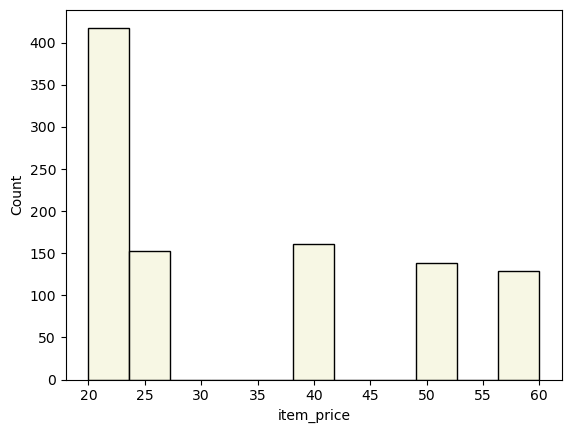

In [75]:
#Data Visualization - Univariate Analysis:
sns.histplot(df['item_price'],color='beige')
plt.show()

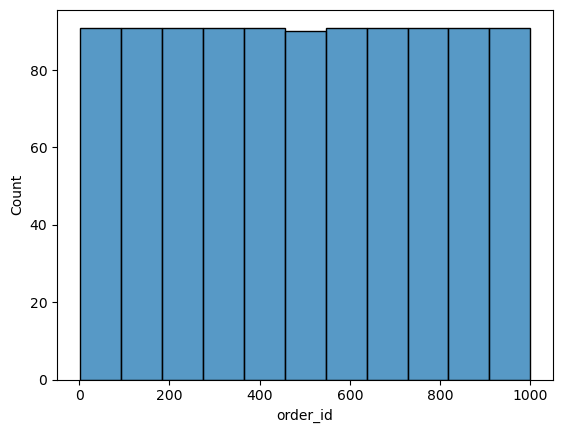

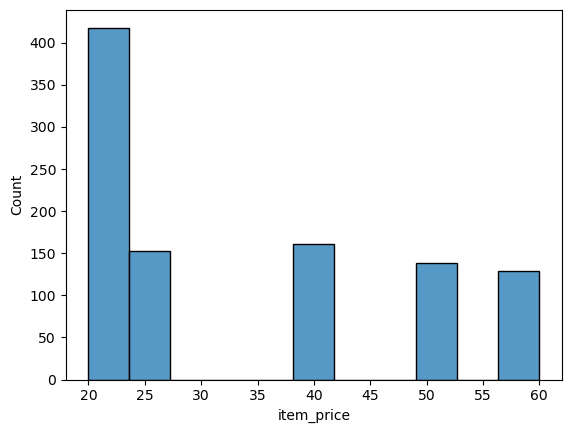

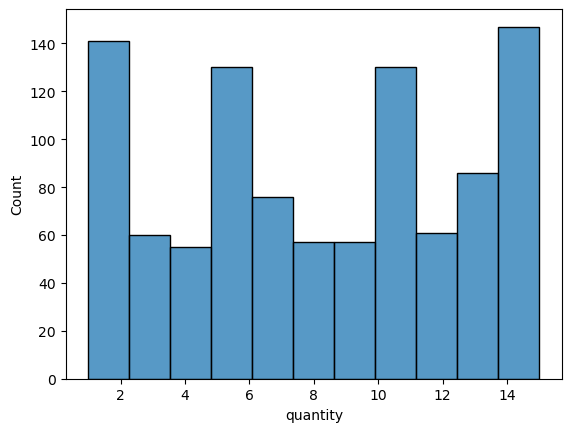

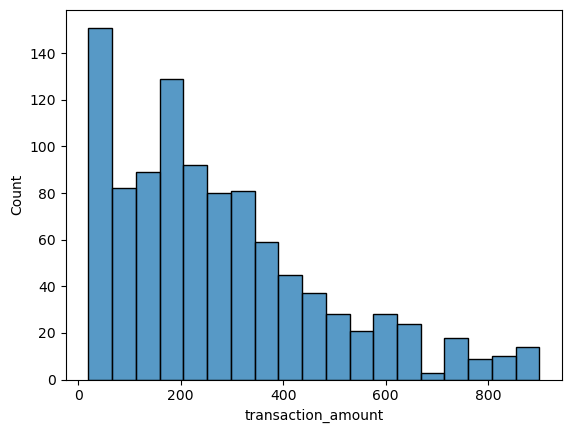

In [73]:
for i in num:
    sns.histplot(df[i])
    plt.show()

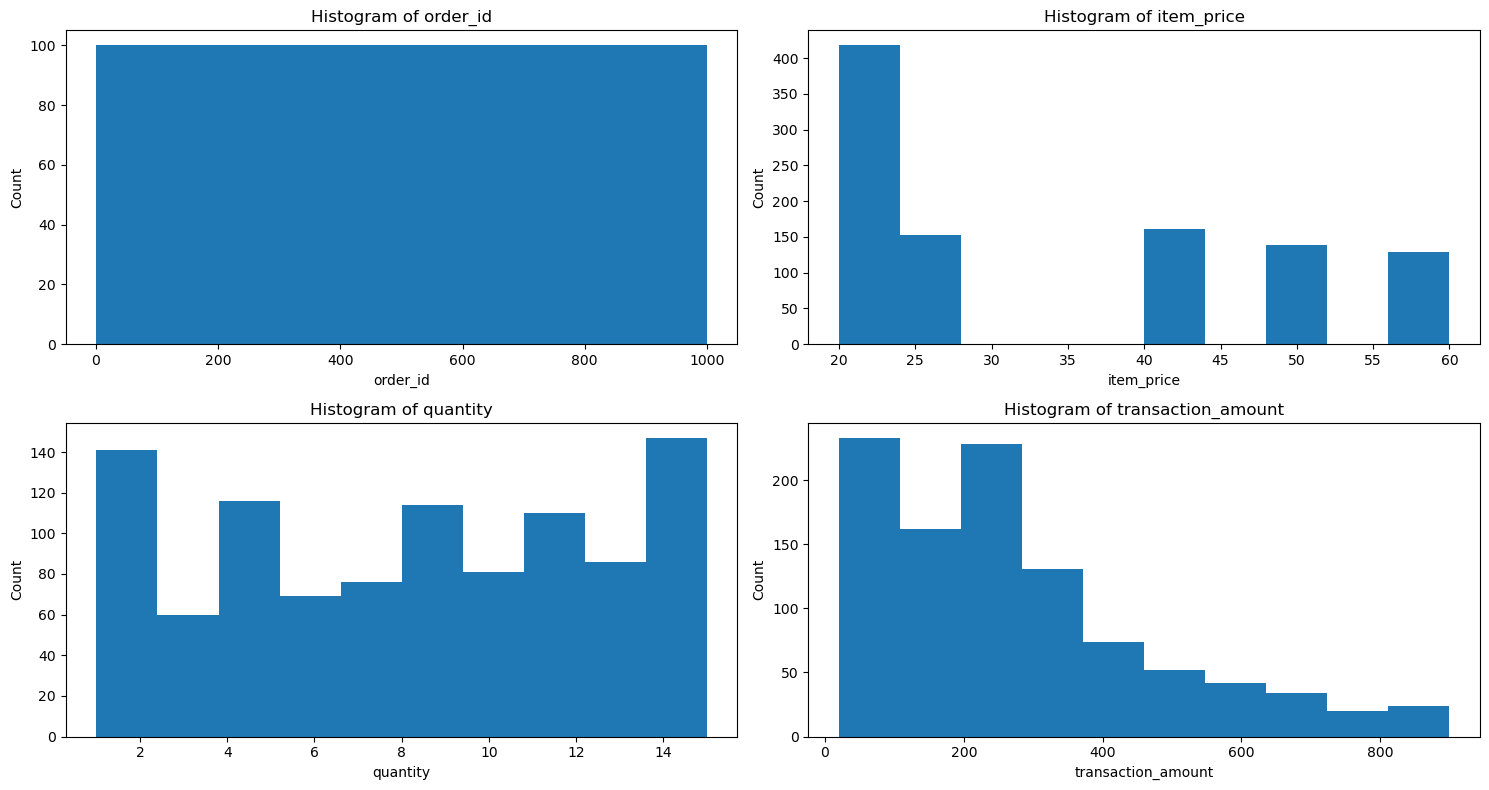

In [79]:
t = 1
plt.figure(figsize=(15, 8))  # Define the figure size
for i in num:
    plt.subplot(2, 2, t)  # Place the subplot before plotting the histogram
    plt.hist(df[i])  # Plot the histogram
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.title(f'Histogram of {i}')  # Corrected title format
    t += 1
plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()
#plt.rcParams['figure.figsize']=[15,8]

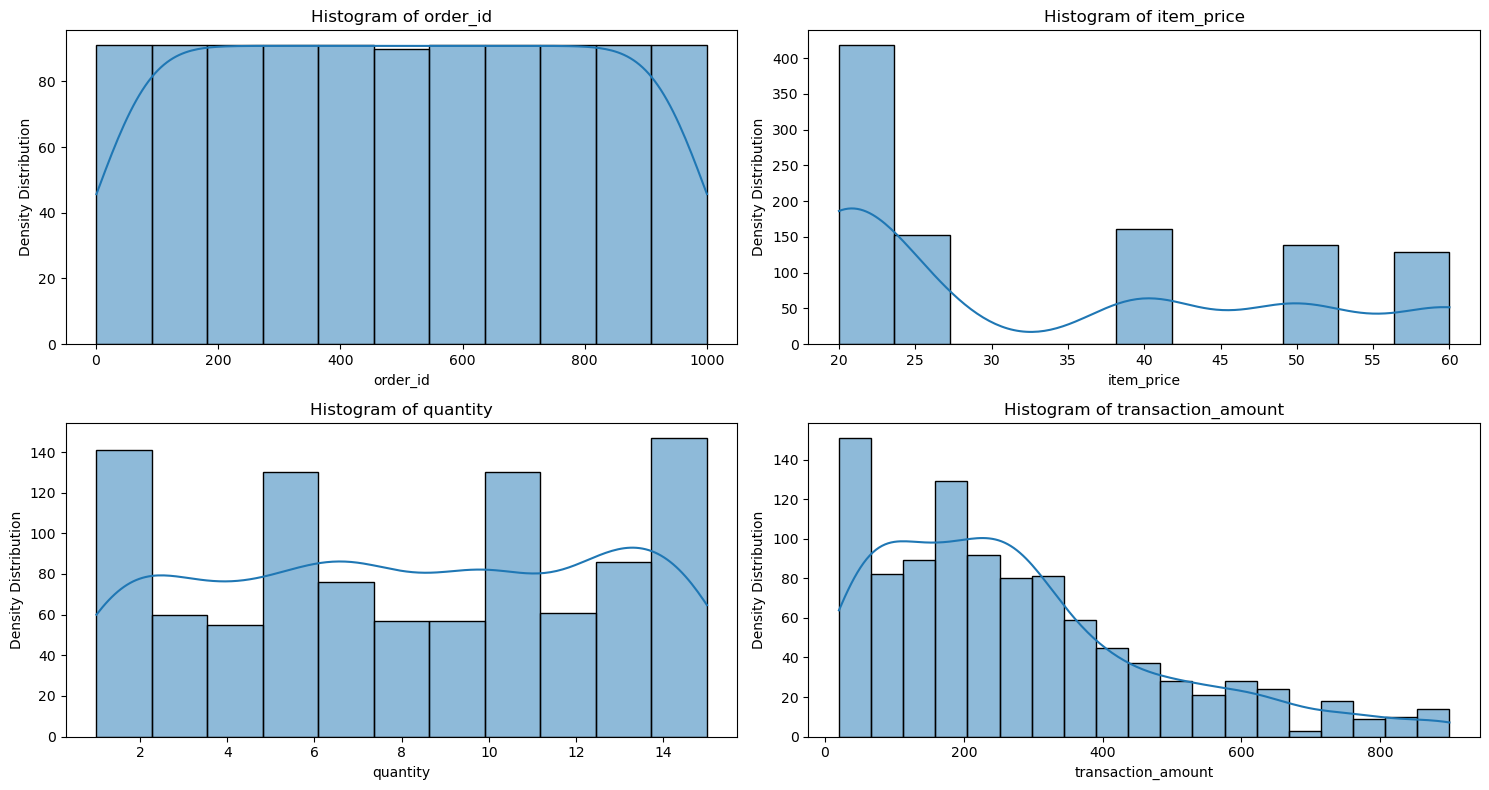

In [89]:

t = 1
plt.figure(figsize=(15, 8))  # Define the figure size
for i in num:
    plt.subplot(2, 2, t)  # Place the subplot before plotting the histogram
    sns.histplot(df[i], kde=True)  # Plot the histogram with KDE
    plt.xlabel(i)
    plt.ylabel('Density Distribution')
    plt.title(f'Histogram of {i}')  # Corrected title format
    t += 1
plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()


Item price varies with higher density distributioin. quantity and trans amount are positively skewed i.e right skewed.

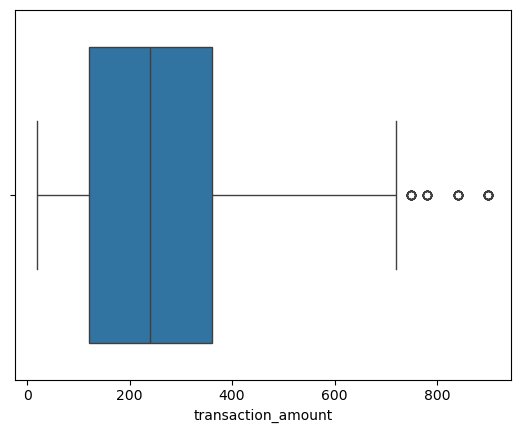

In [91]:
#Checking of Outliers using Boxplot:
sns.boxplot(x=df['transaction_amount'])
plt.show()

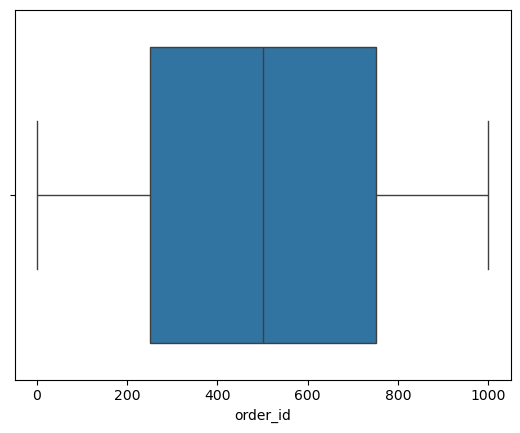

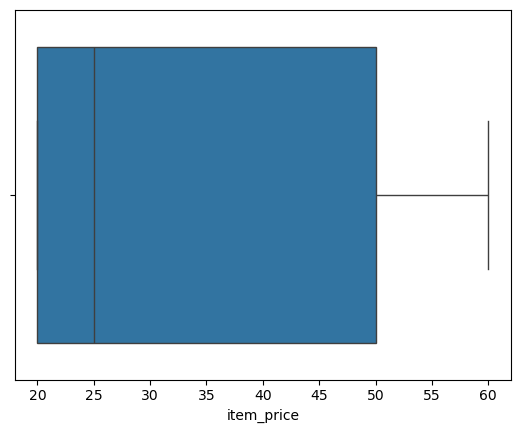

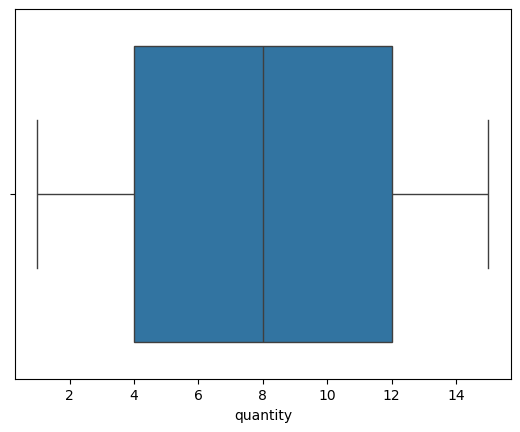

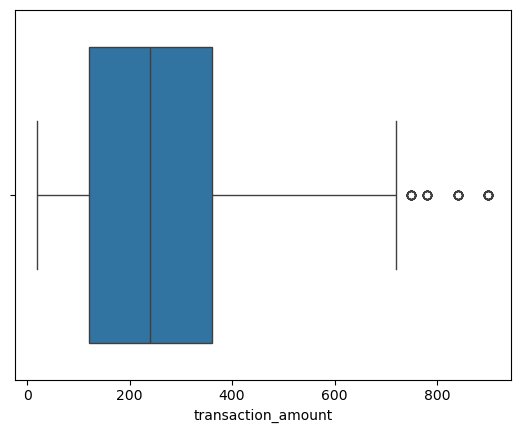

In [93]:
for i in num:
    sns.boxplot(x=df[i])
    plt.show()

Outliers are present in transaction amount. Orderid,transaction_amount ,quantityhas equal quantile of 50 percent.

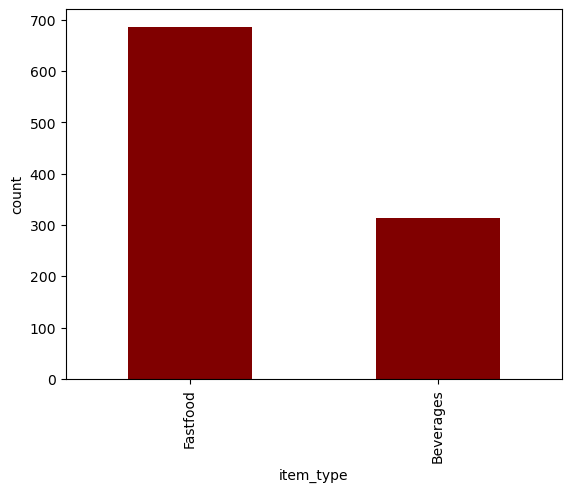

In [100]:
#cat:
df['item_type'].value_counts().plot(kind='bar',color='Maroon')
plt.ylabel('count')
plt.show()


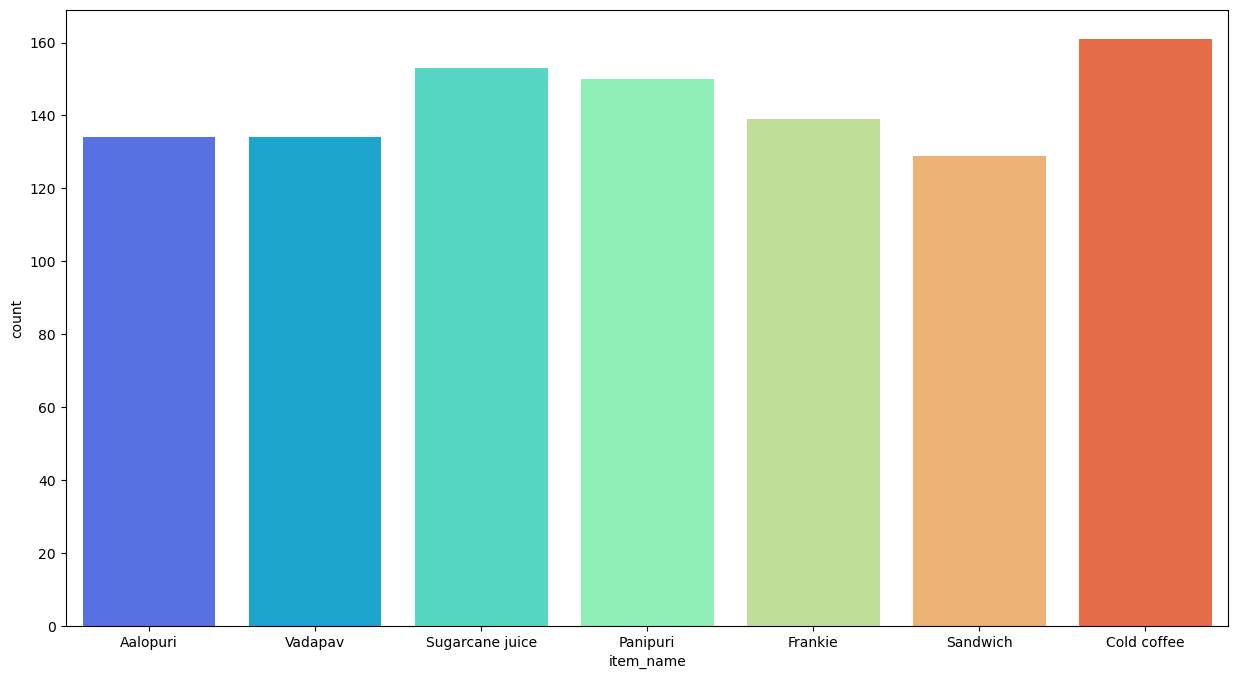

In [104]:
plt.rcParams['figure.figsize']=[15,8]
sns.countplot(x=df['item_name'],palette='rainbow')
plt.show()

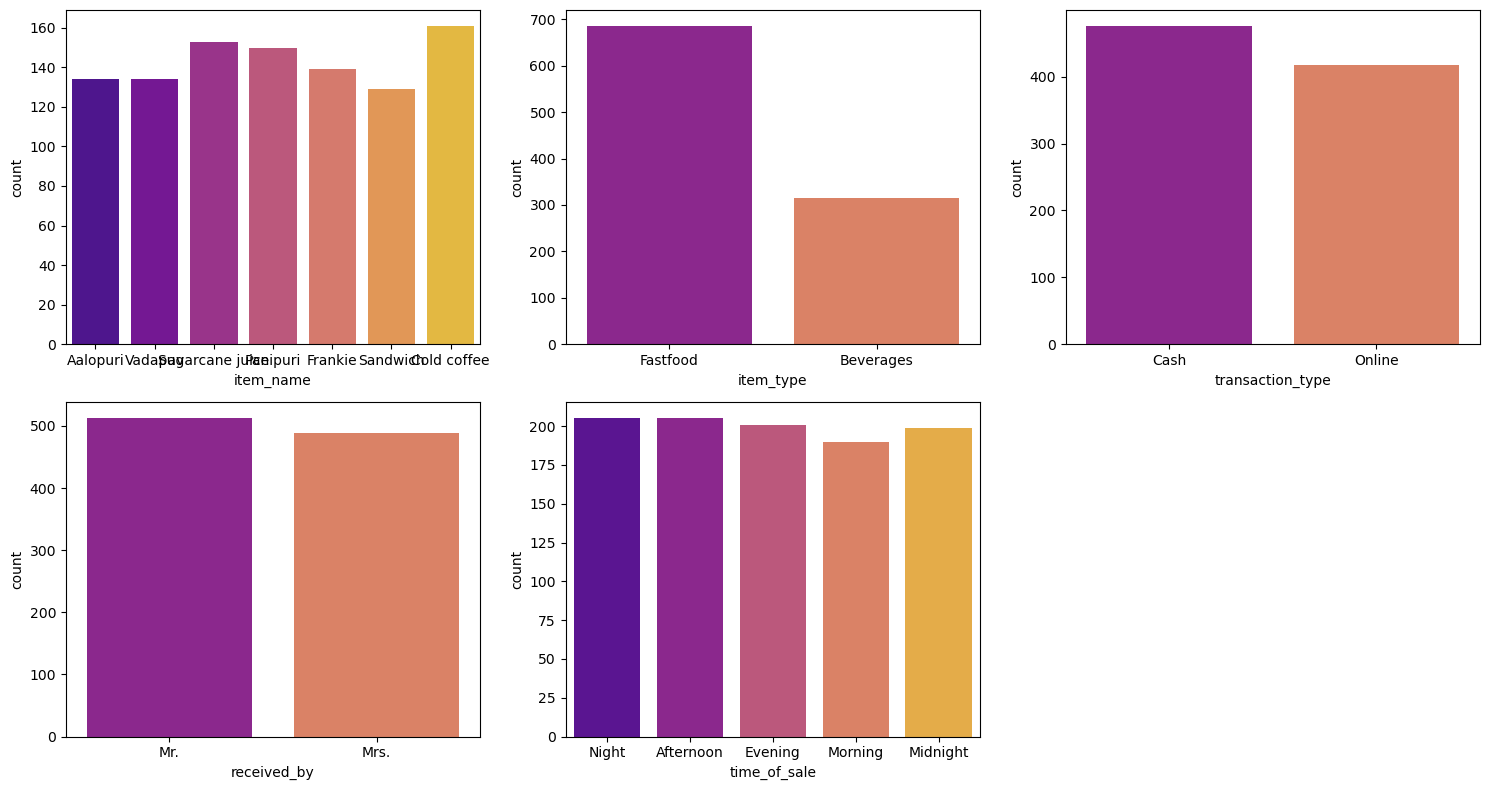

In [108]:
t=1
for i in cat:
    if i!='date':
        plt.subplot(2,3,t)
        sns.countplot(x=df[i],palette='plasma')
        t+=1
plt.tight_layout()
plt.show()

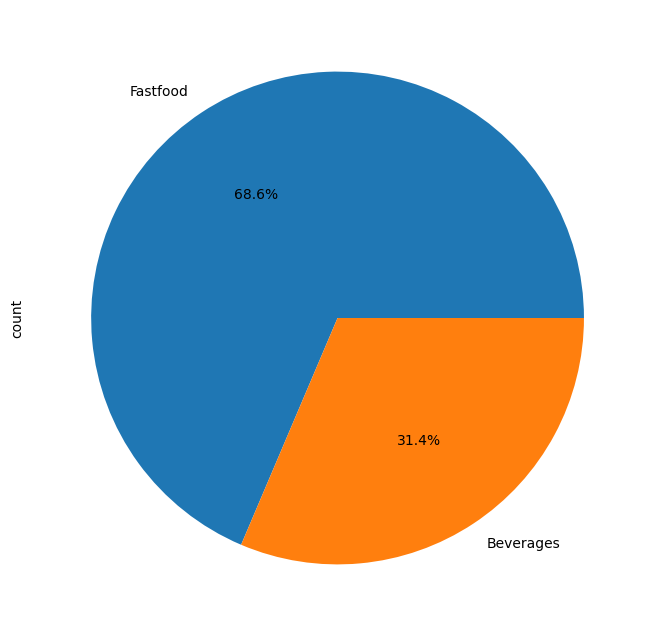

In [112]:
df['item_type'].value_counts().plot(kind='pie',autopct="%.1f%%")
plt.show()
                                    

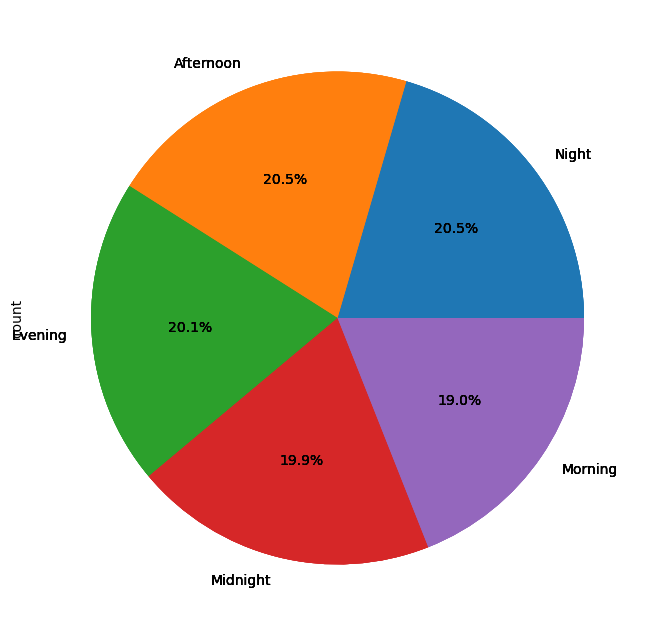

In [116]:
for item in num:
 df[i].value_counts().plot(kind='pie',autopct="%.1f%%")
plt.show()
             

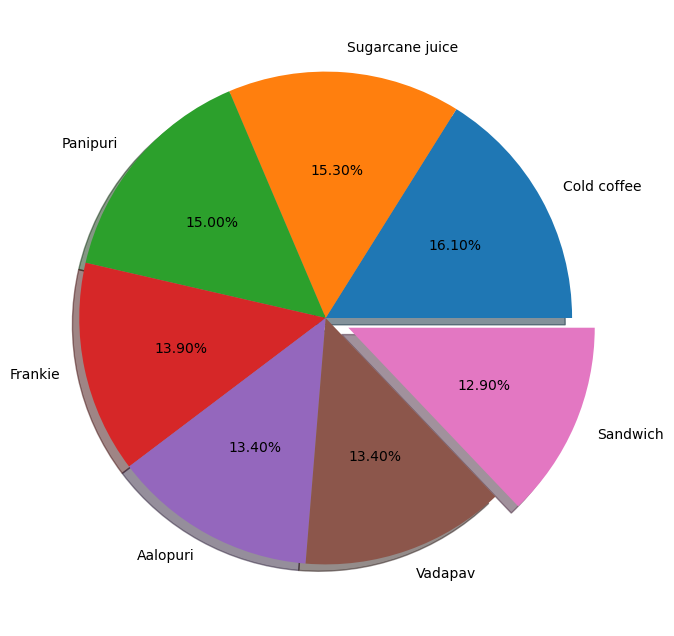

In [122]:
plt.pie(x=df['item_name'].value_counts(),labels=df['item_name'].value_counts().index,autopct='%.2f%%',shadow=True,explode=[0,0,0,0,0,0,0.1])
plt.show()

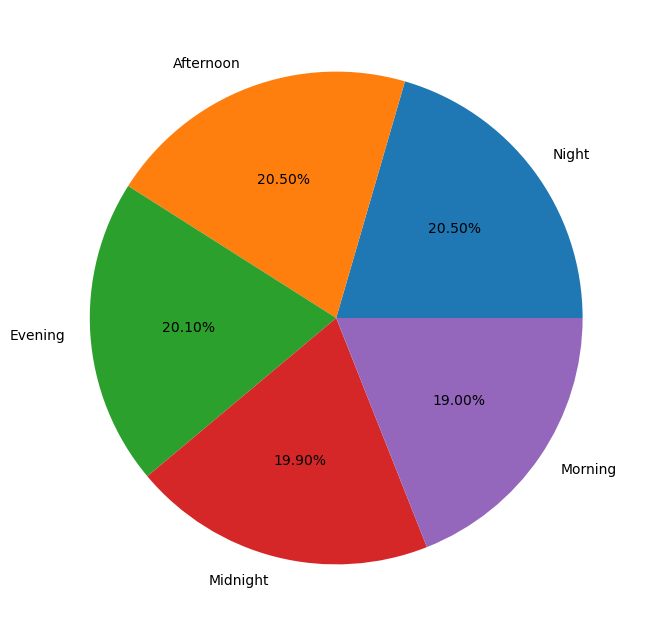

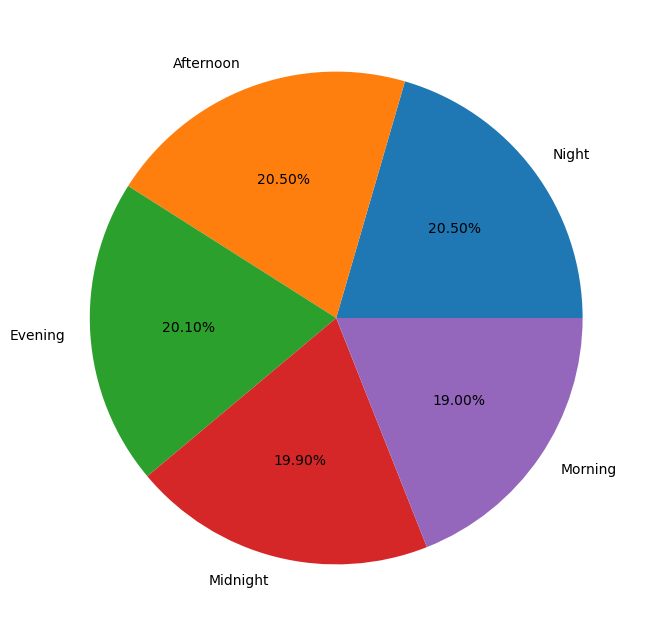

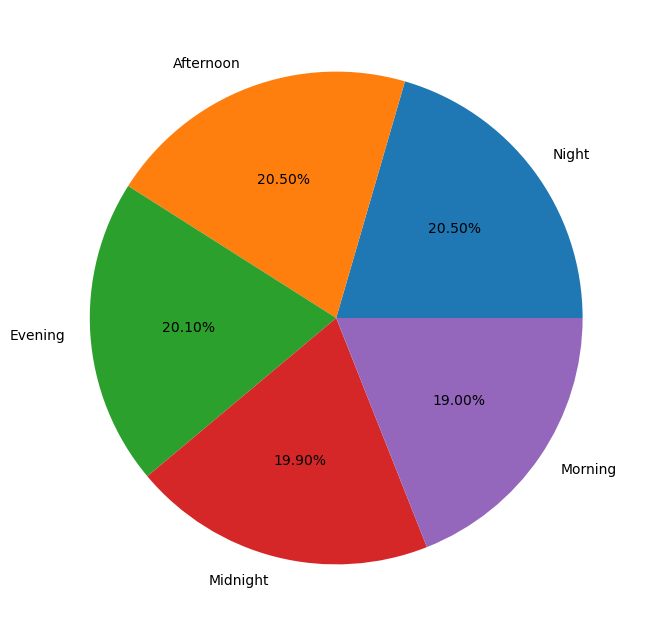

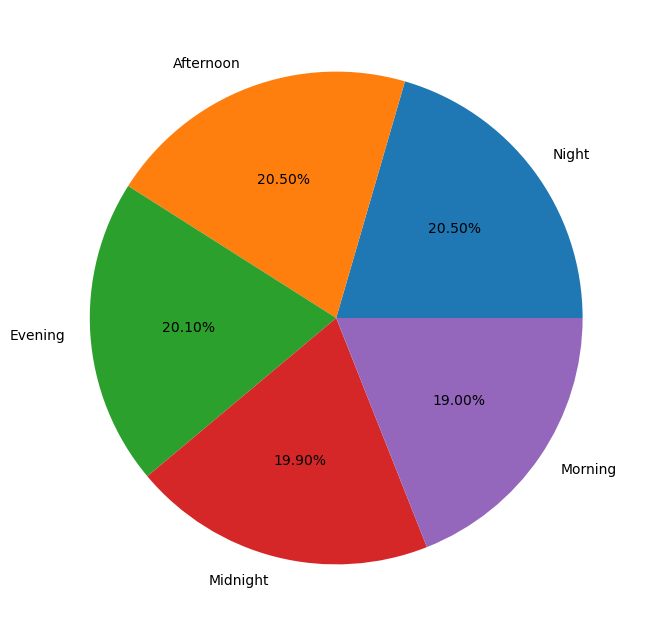

In [126]:
for item in num:
    plt.pie(x=df[i].value_counts(),labels=df[i].value_counts().index,autopct='%.2f%%')
    plt.show()

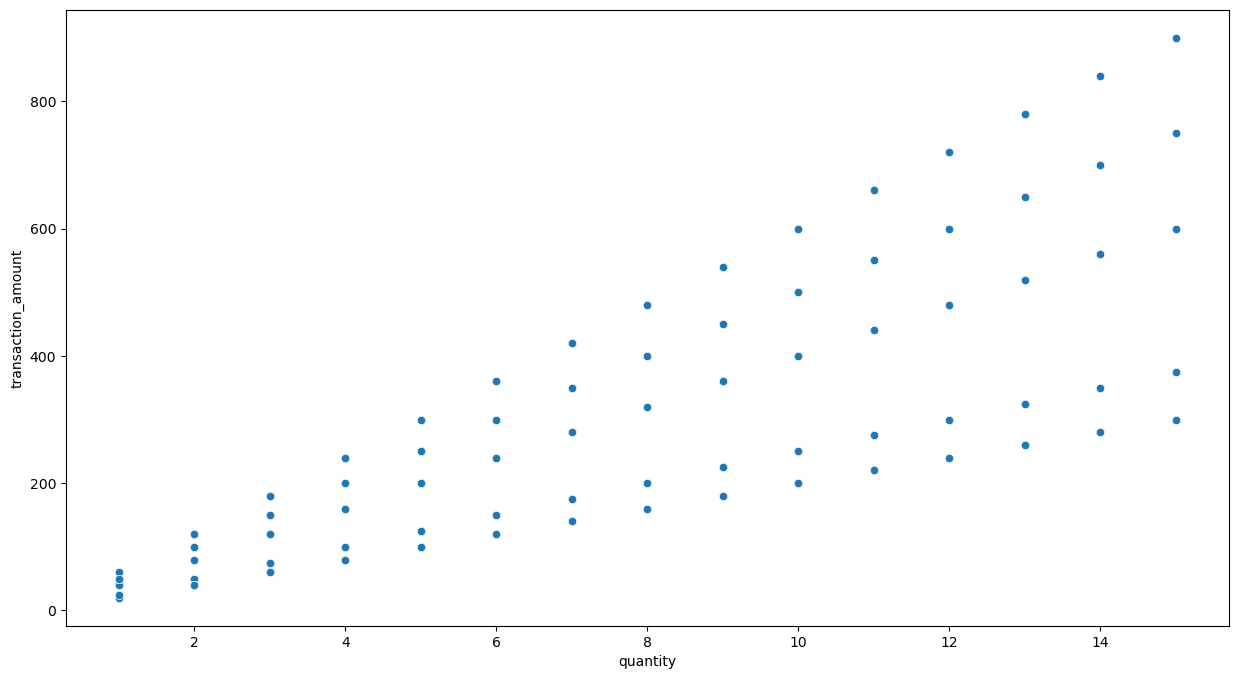

In [128]:
#Bivariate:
sns.scatterplot(x=df['quantity'],y=df['transaction_amount'])
plt.show()


The higher the price, the transaction amount increases.

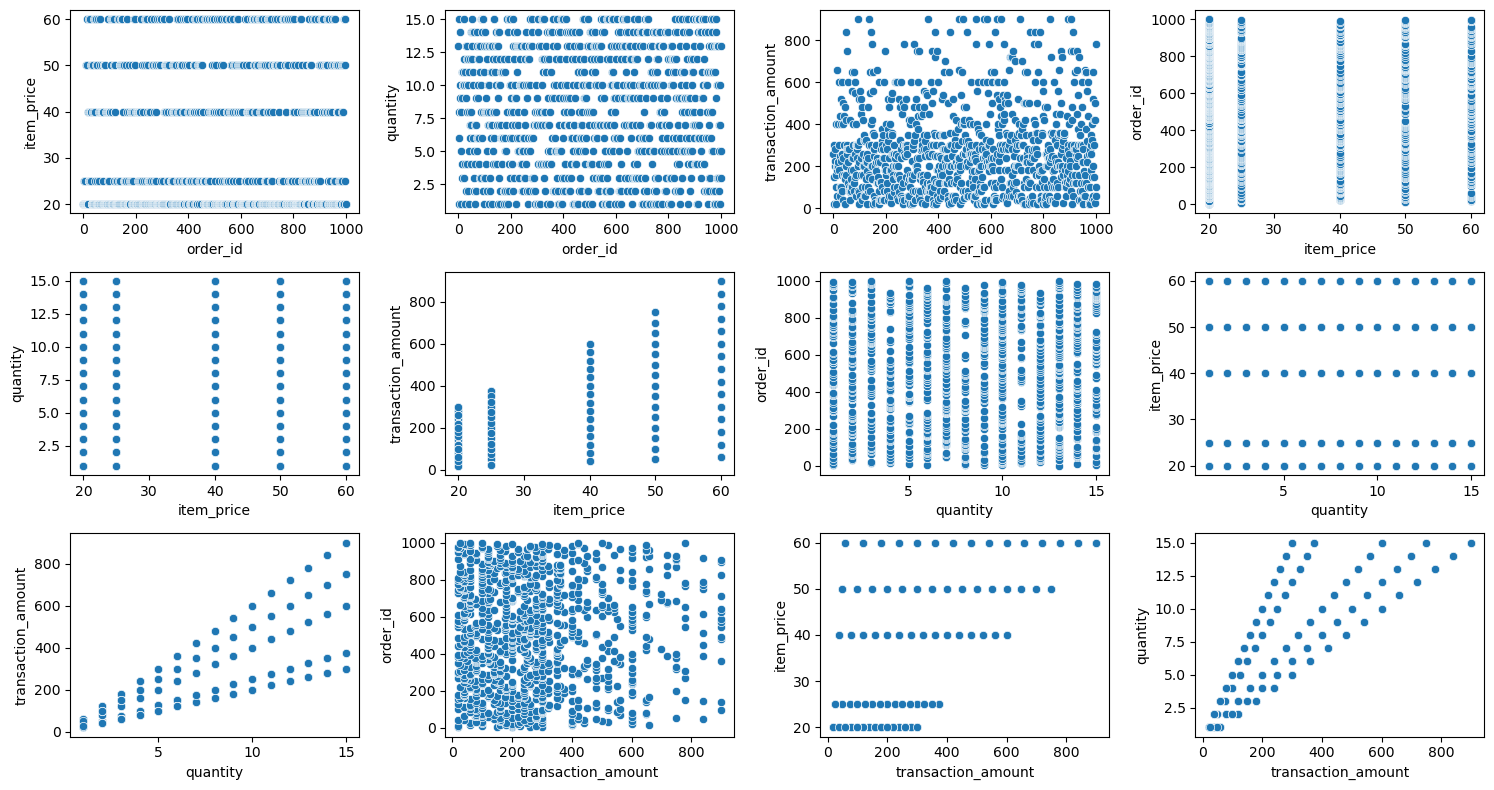

In [131]:
t=1
for i in num:
    for j in num:
        if i!=j:
            plt.subplot(3,4,t)
            sns.scatterplot(x=df[i],y=df[j])
            t+=1
plt.tight_layout()
plt.show()

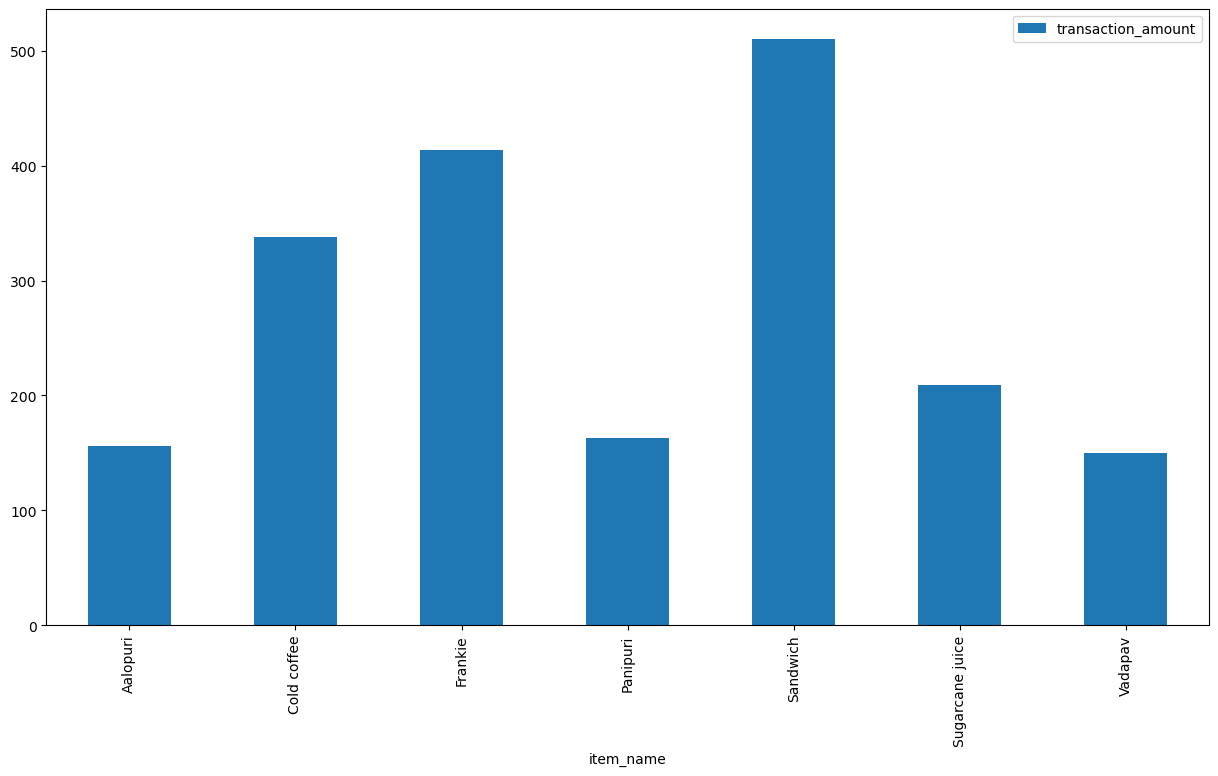

In [133]:
df.groupby(by='item_name')[['transaction_amount']].mean().plot(kind='bar')
plt.show()

The average transaction_amt of sandwich is more in my data.

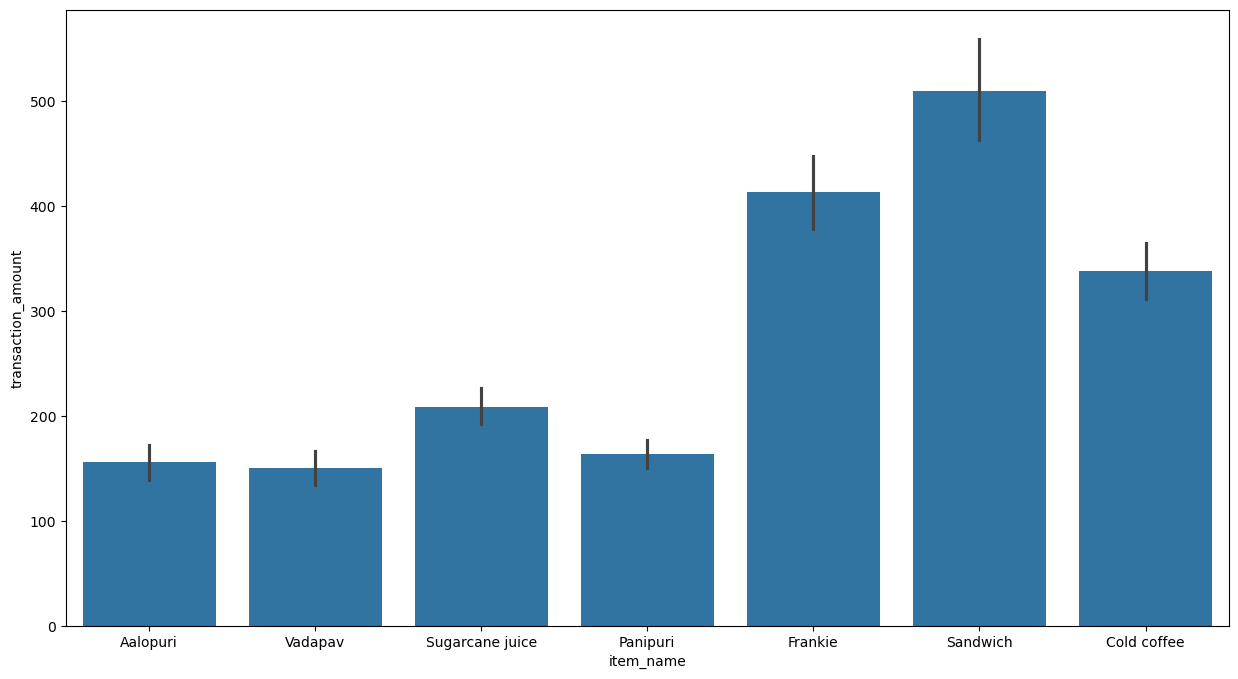

In [136]:
sns.barplot(x=df['item_name'],y=df['transaction_amount'])
plt.show()

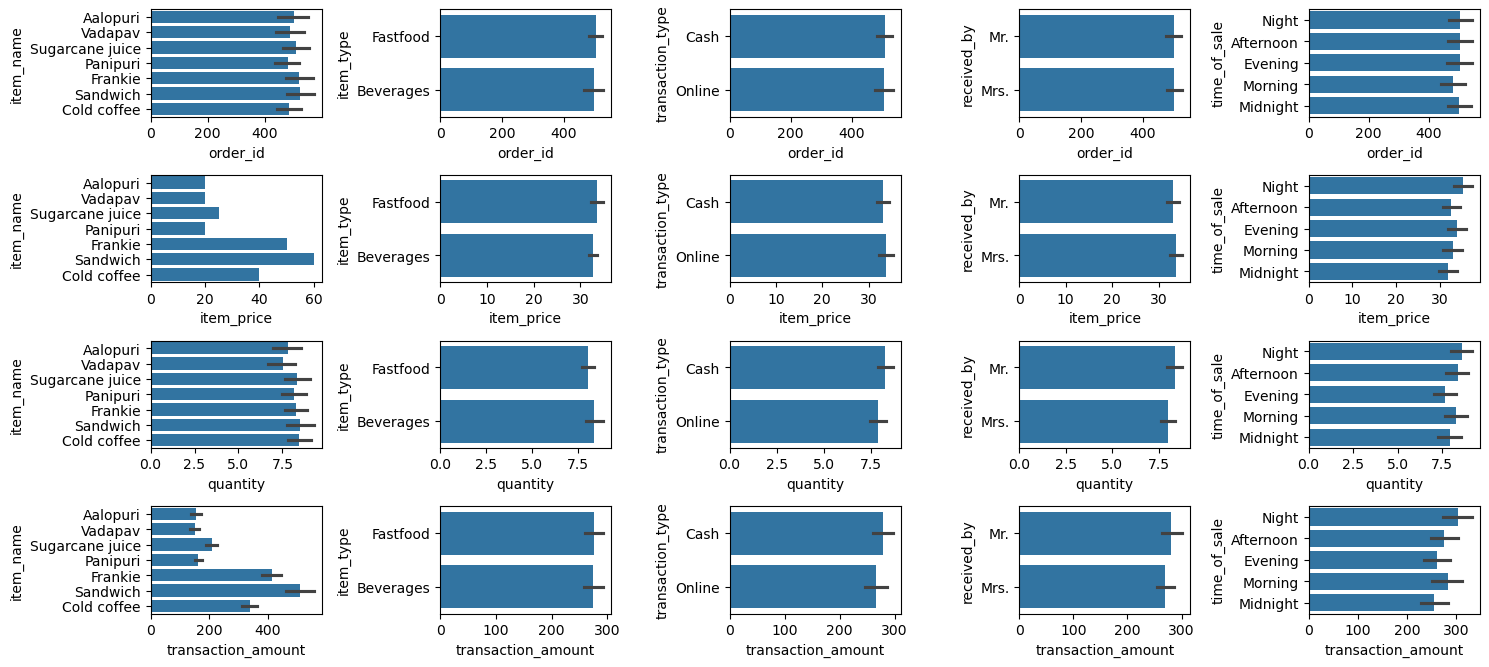

In [144]:
t=1
for i in num:
    for j in cat:
        if j!= 'date':
          plt.subplot(5,5,t)
          sns.barplot(x=df[i],y=df[j])
          t+=1
plt.tight_layout()
plt.show()

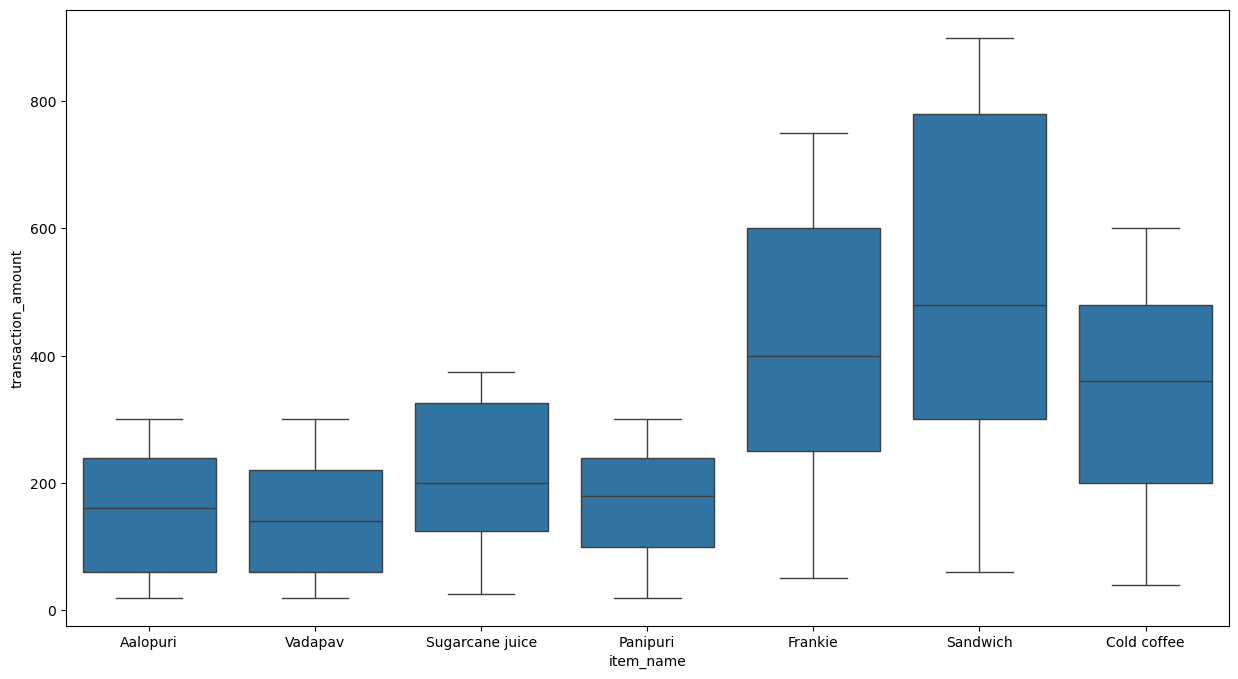

In [146]:
sns.boxplot(x=df['item_name'],y=df['transaction_amount'])
plt.show()

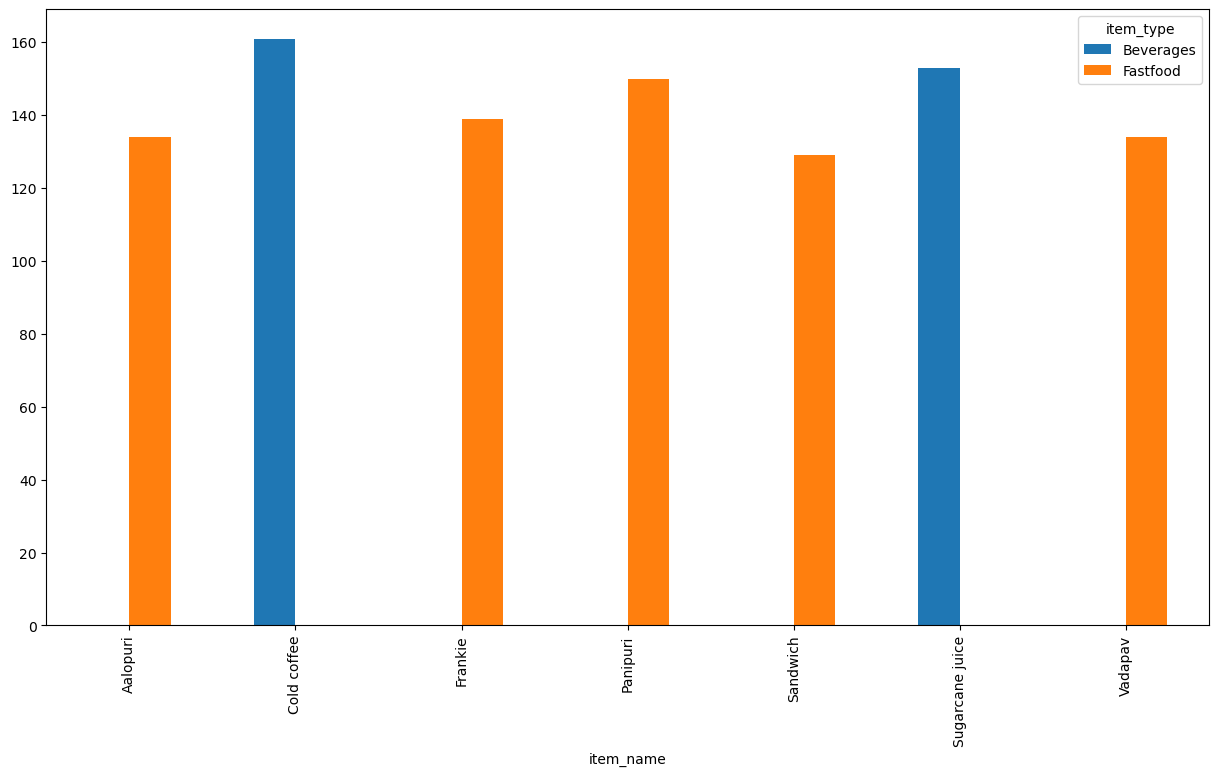

In [148]:
pd.crosstab(df['item_name'],df['item_type']).plot(kind='bar')
plt.show()

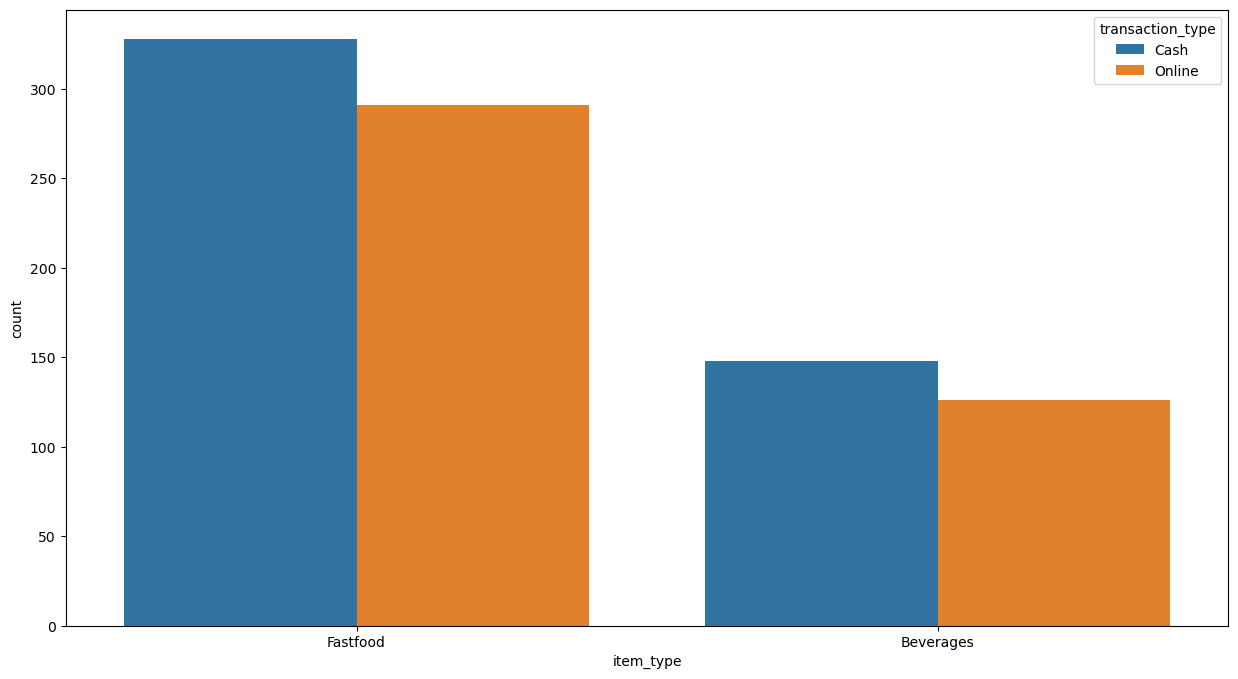

In [150]:
sns.countplot(x=df['item_type'],hue=df['transaction_type'])
plt.show()

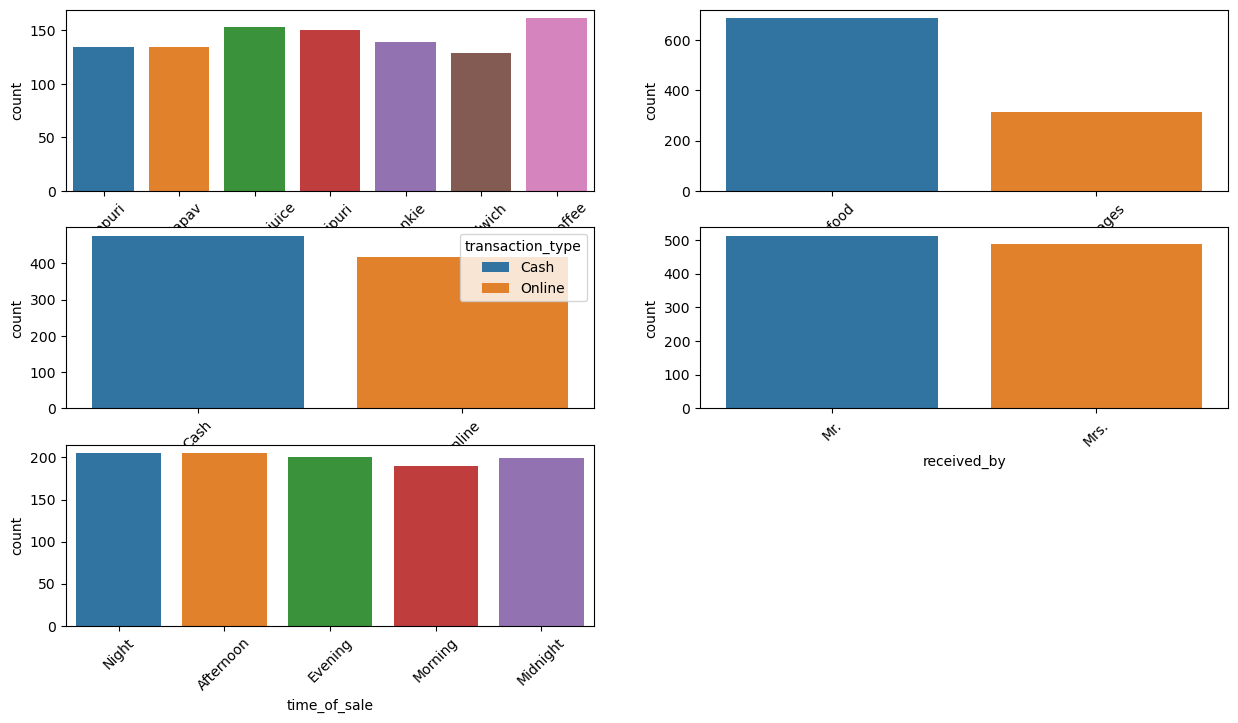

In [152]:
t=1
for i in cat:
    if i != 'date':
        plt.subplot(3,2,t)
        sns.countplot(x=df[i],hue=df[i])
        plt.xticks(rotation=45)
        t+=1
plt.show()

In [154]:
#Num vs Num Vs Cat

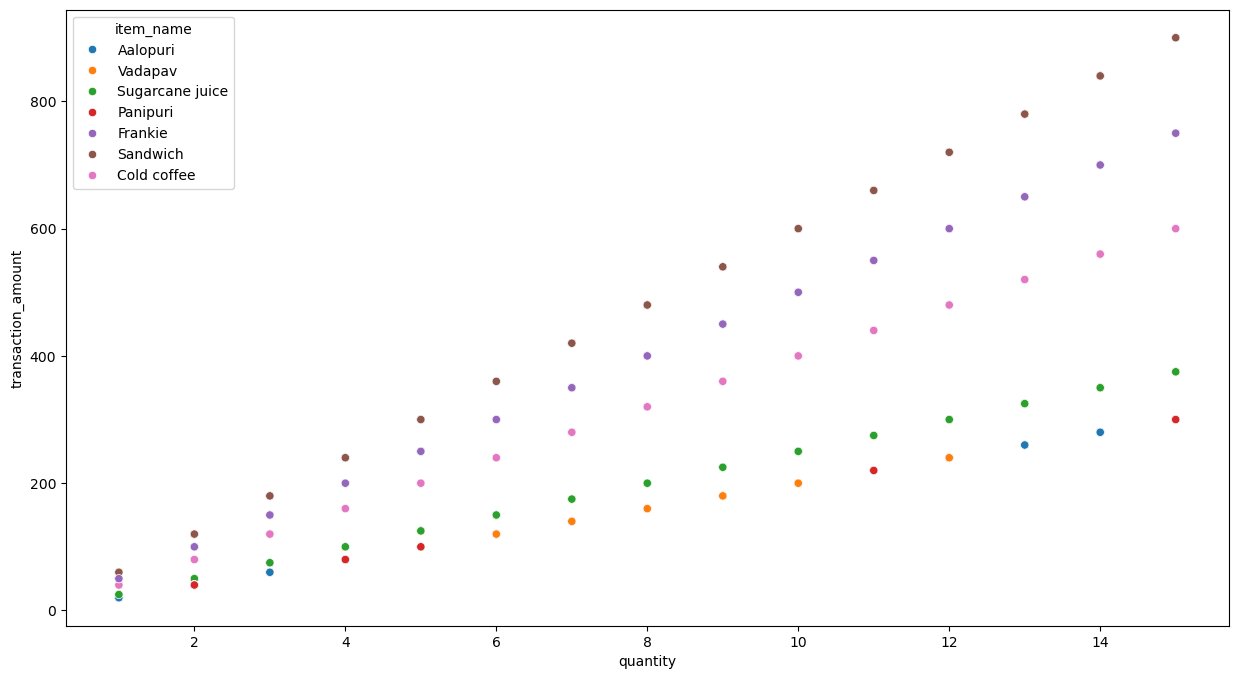

In [158]:
sns.scatterplot(x=df['quantity'],y=df['transaction_amount'],hue=df['item_name'])
plt.show()

In [160]:
#Num Vs Cat Vs Cat

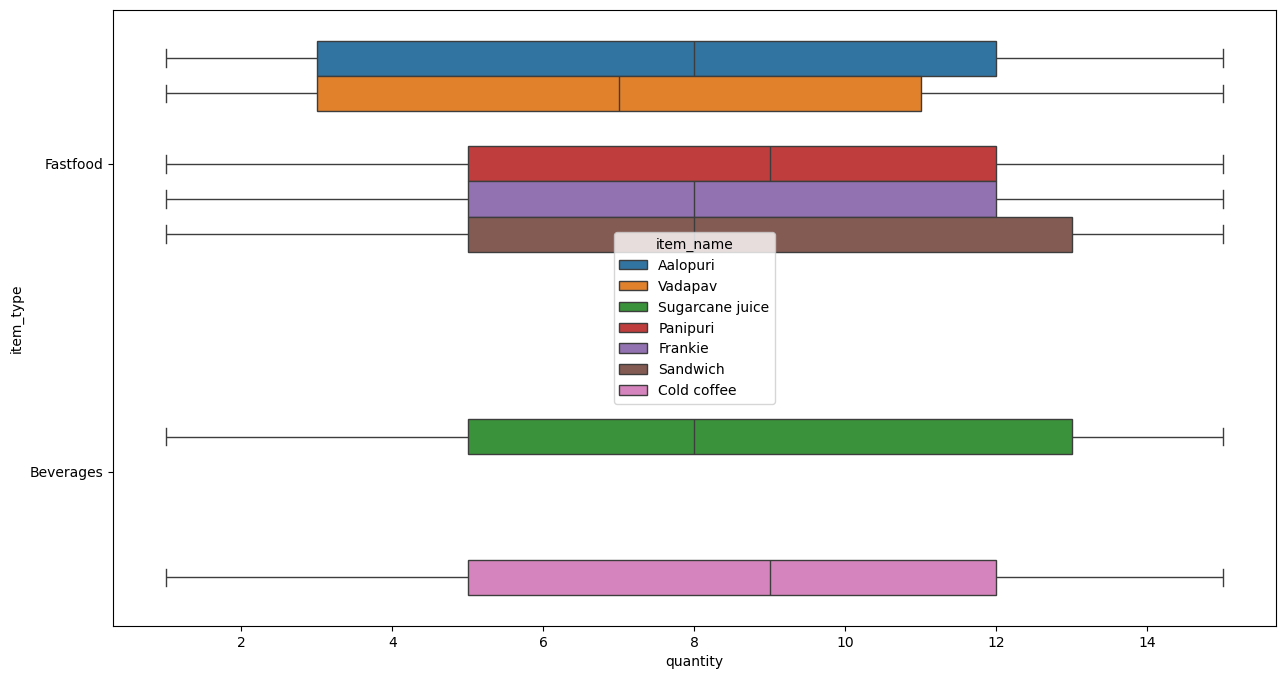

In [162]:
sns.boxplot(x=df['quantity'],y=df['item_type'],hue=df['item_name'])
plt.show()

In [164]:
#heatmap
df[num].corr()

,order_id,item_price,quantity,transaction_amount
order_id,1.000000,0.037028,0.010345,0.043970
item_price,0.037028,1.000000,0.050361,0.637238
quantity,0.010345,0.050361,1.000000,0.731806
transaction_amount,0.043970,0.637238,0.731806,1.000000


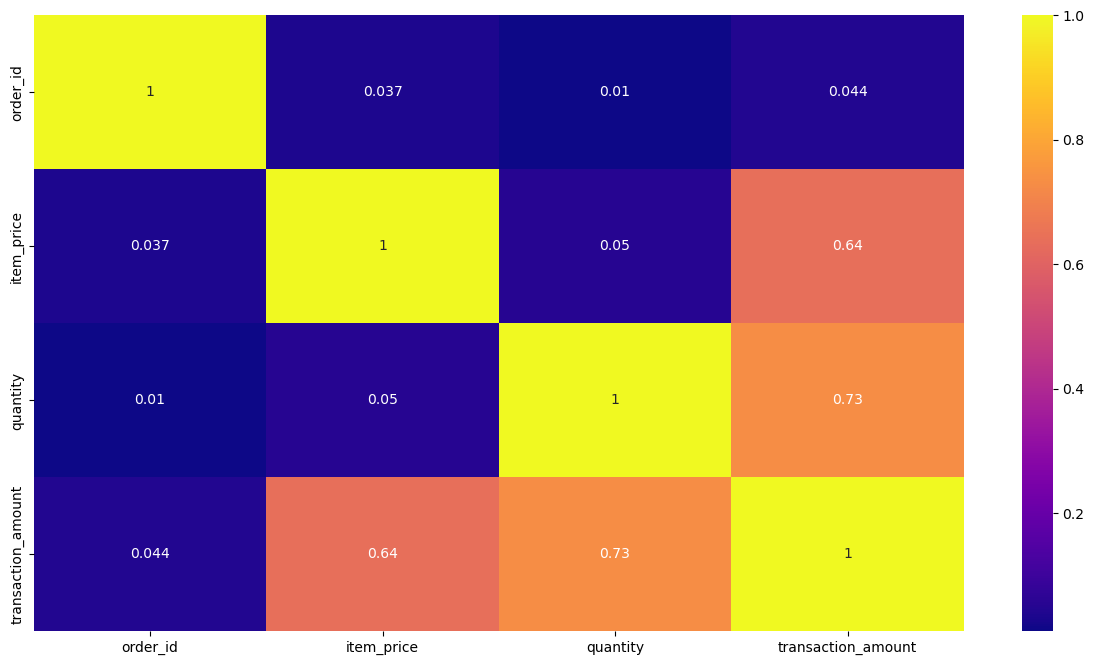

In [166]:
sns.heatmap(df[num].corr(),annot=True,cmap='plasma')
plt.show()

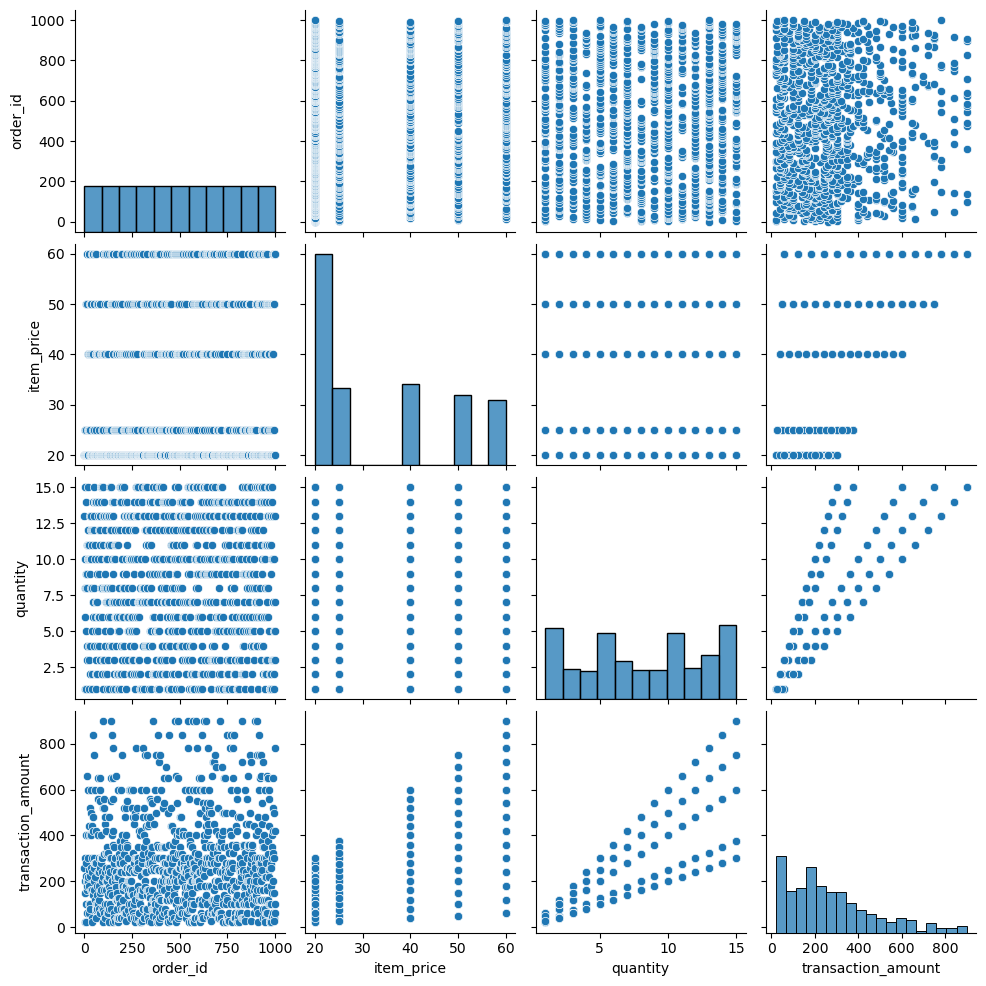

In [168]:
sns.pairplot(df)
plt.show()

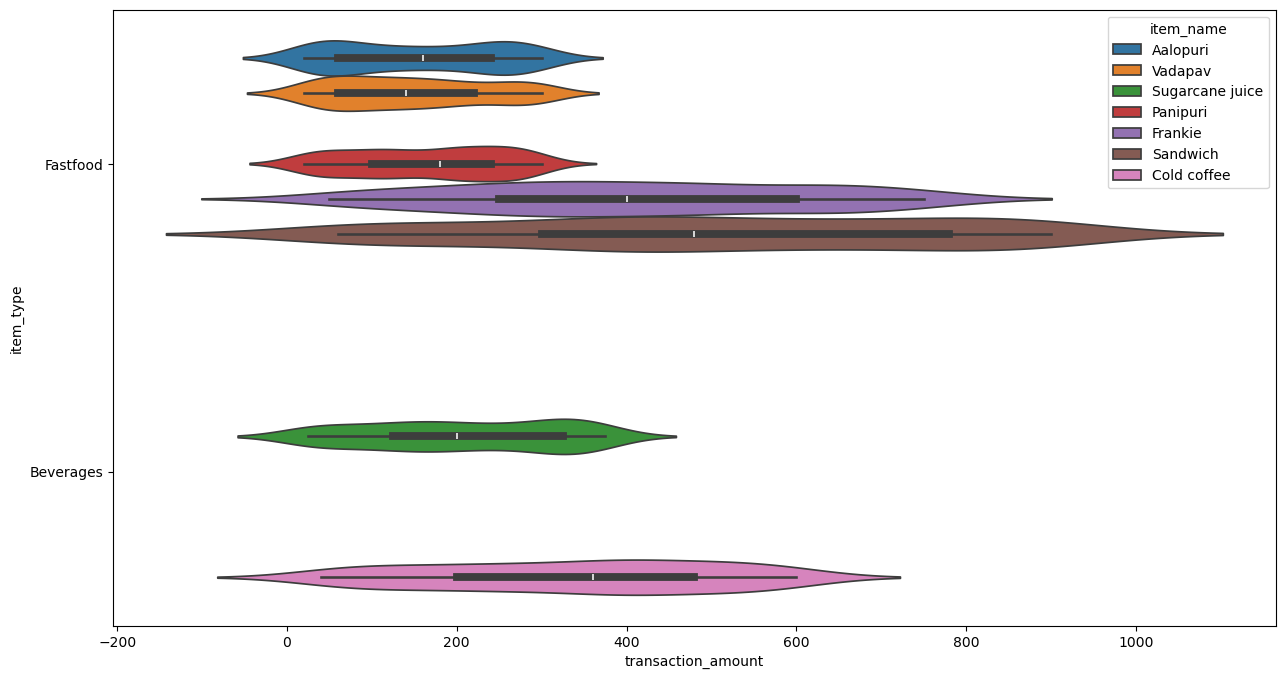

In [170]:
sns.violinplot(x=df['transaction_amount'],y=df['item_type'],hue=df['item_name'])
plt.show()

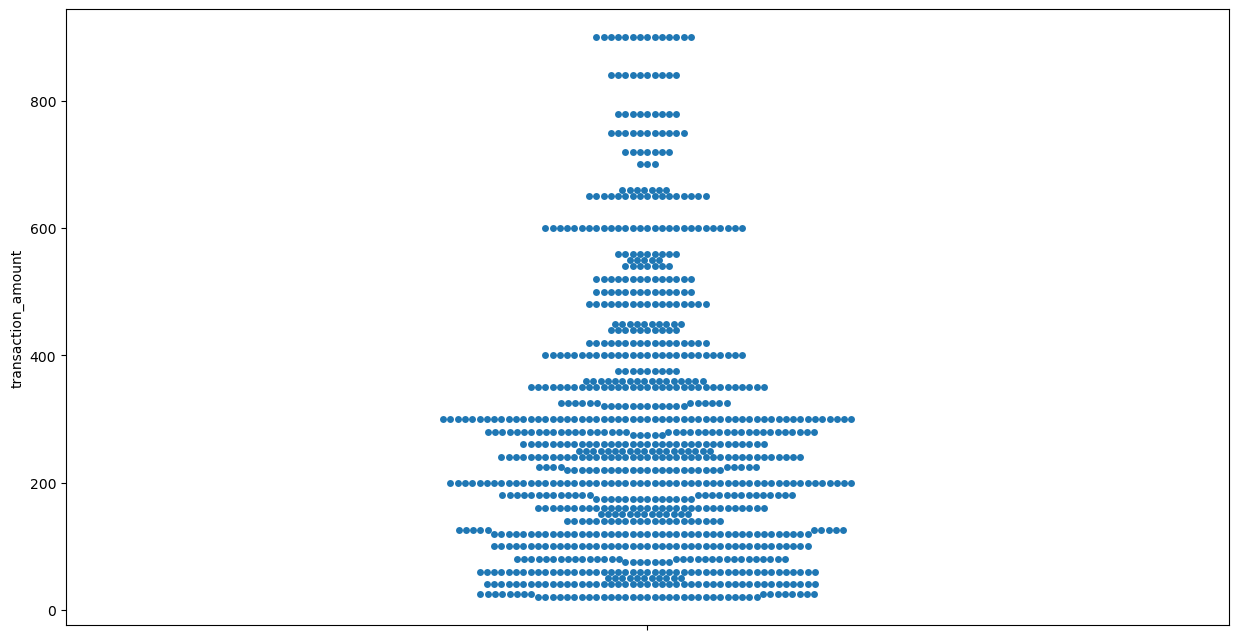

In [172]:
sns.swarmplot(df['transaction_amount'])
plt.show()

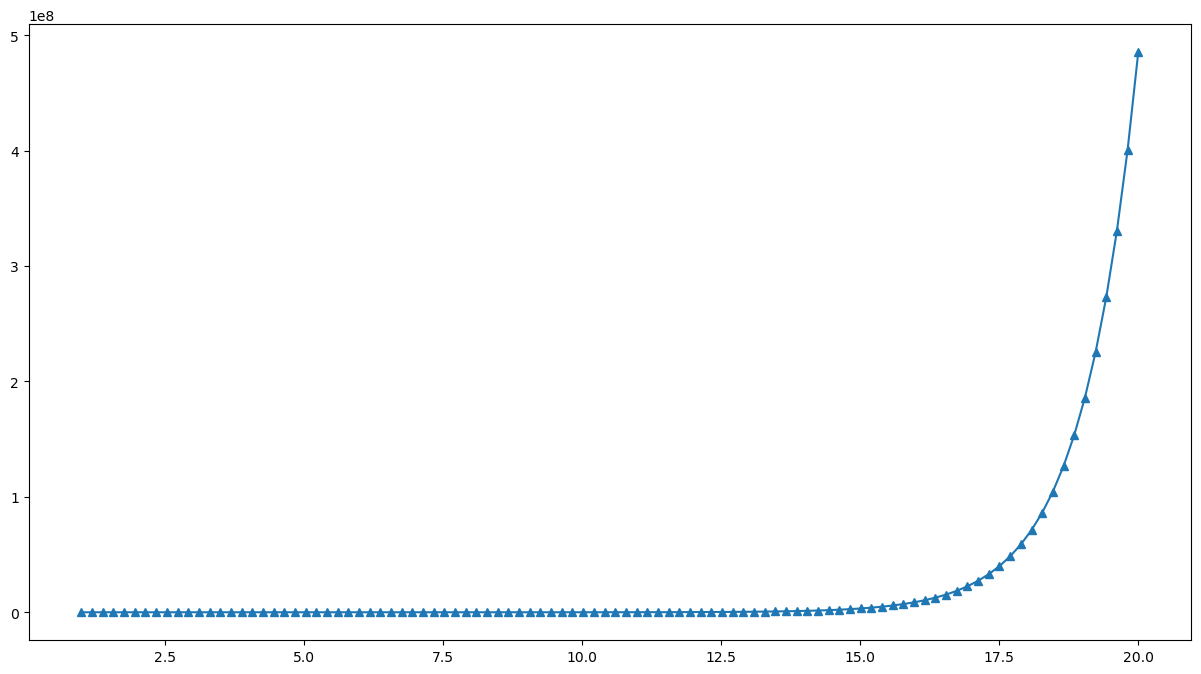

In [174]:
#line plot
x=np.linspace(1,20,100)
y=np.exp(x)
plt.plot(x,y,marker='^')
plt.show()

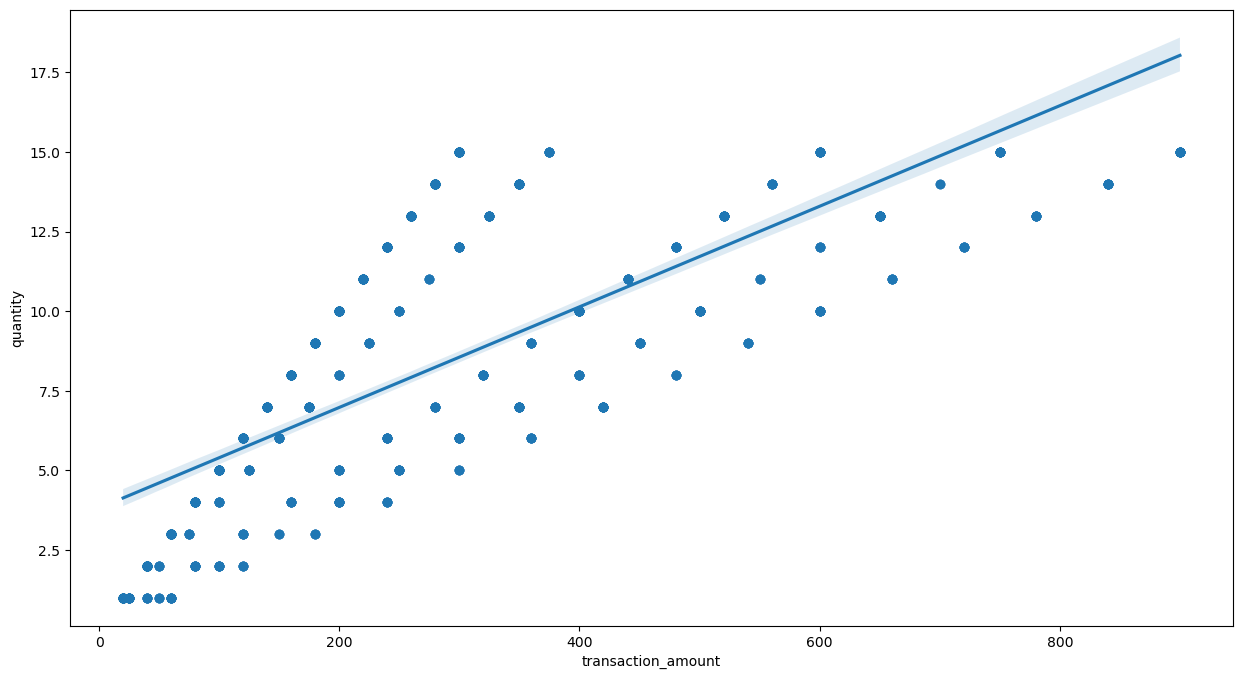

In [176]:
#Regression
sns.regplot(x=df['transaction_amount'],y=df['quantity'])
plt.show()